         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375
Index(['X1', 'X2', 'X3', 'Y'], dtype='object')


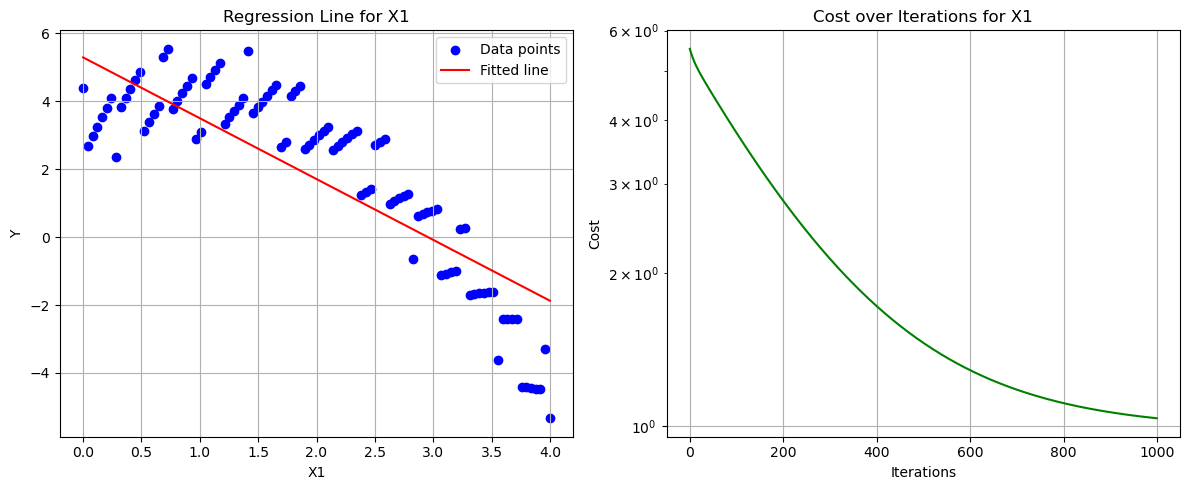

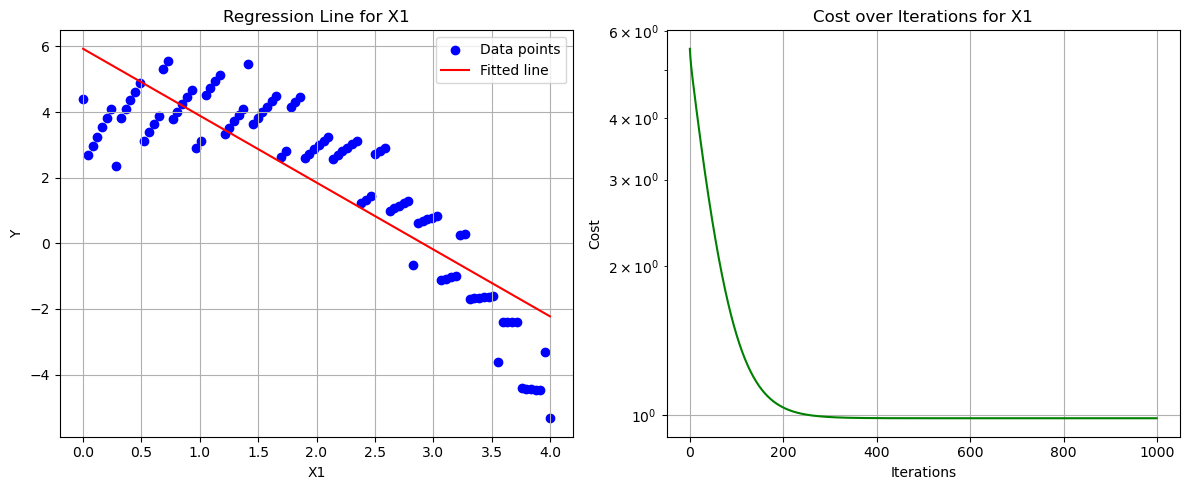

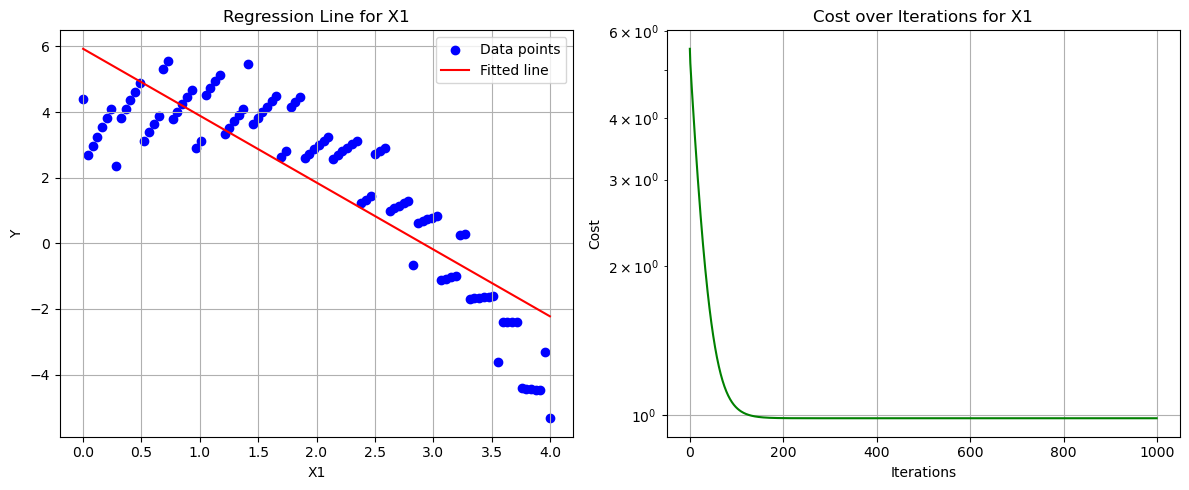

Minimum loss for X1 at learning rate 0.05: 0.9849930834751573


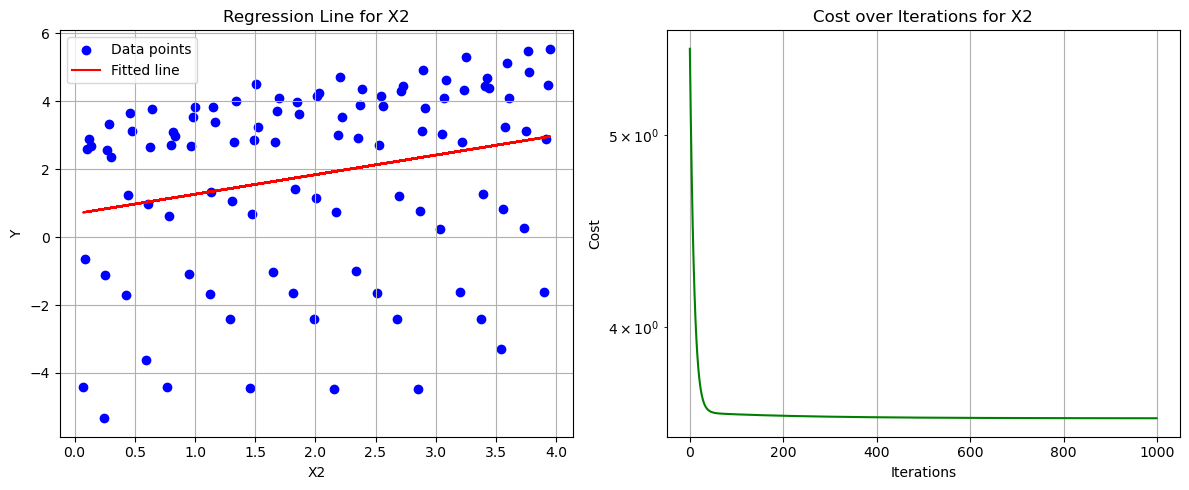

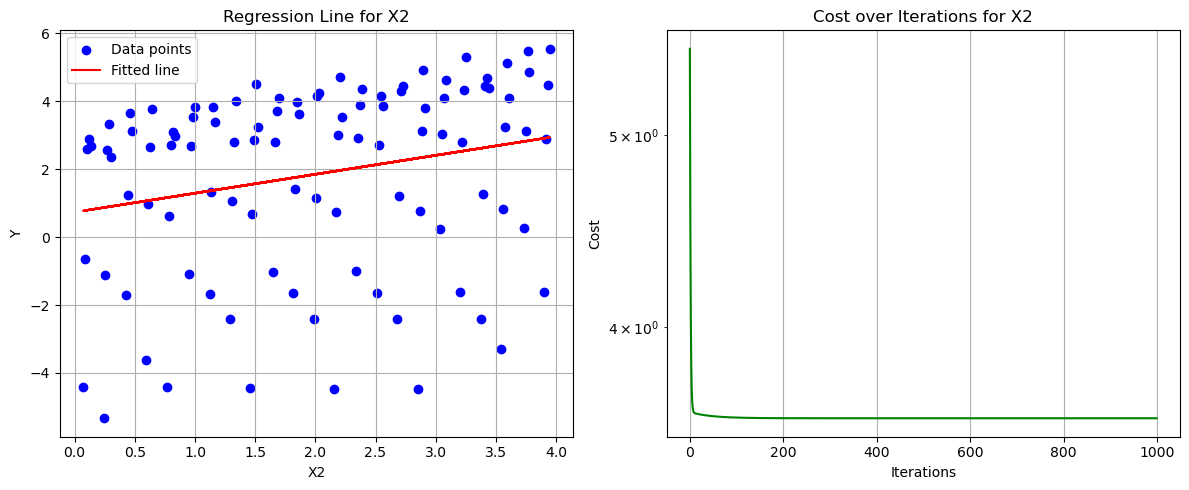

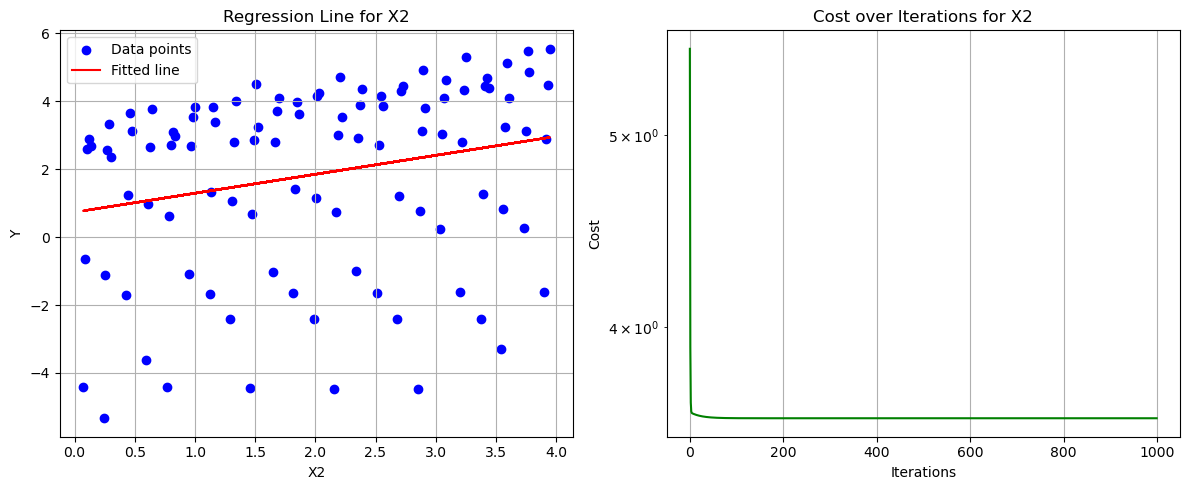

Minimum loss for X2 at learning rate 0.05: 3.59936601817362


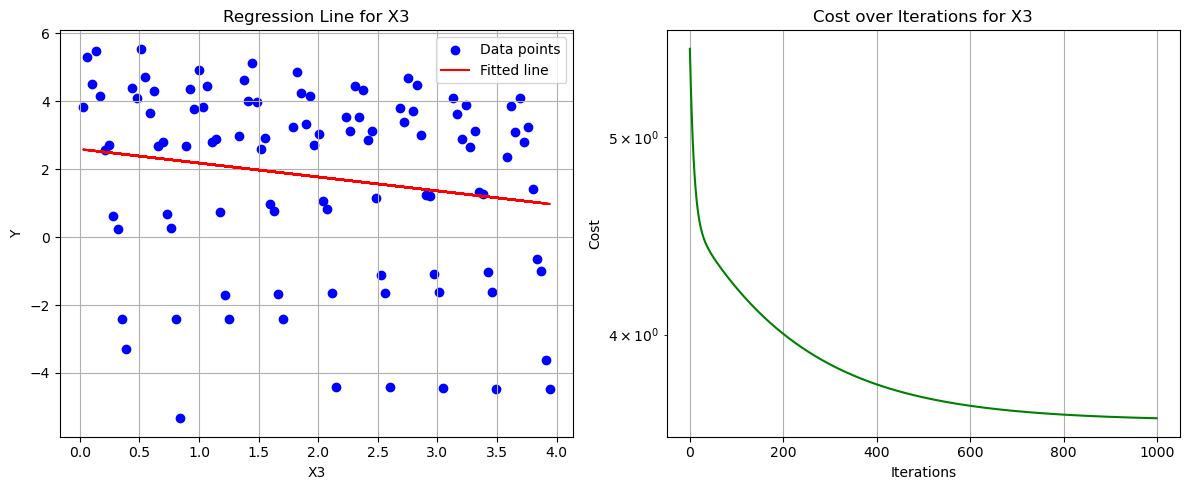

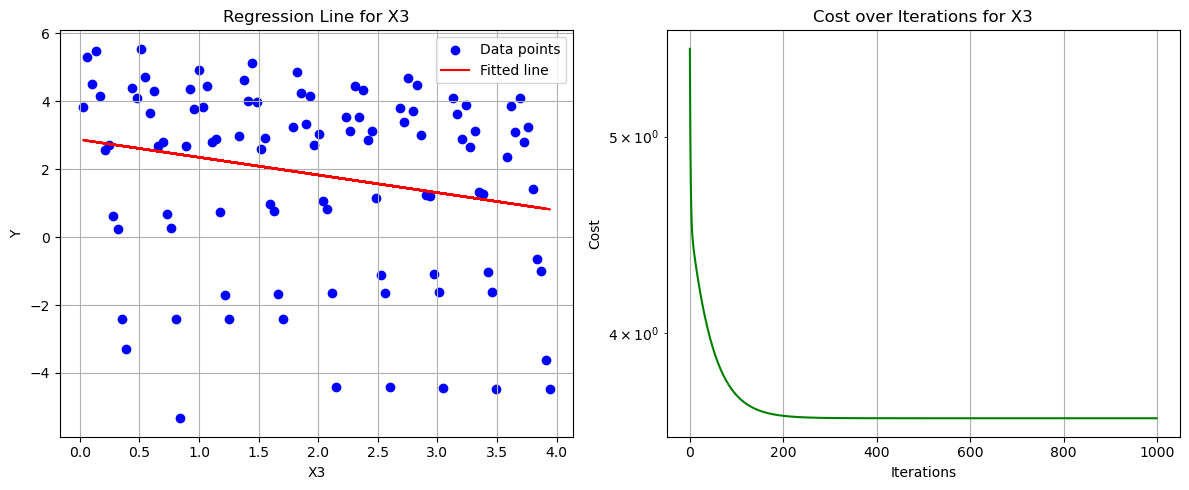

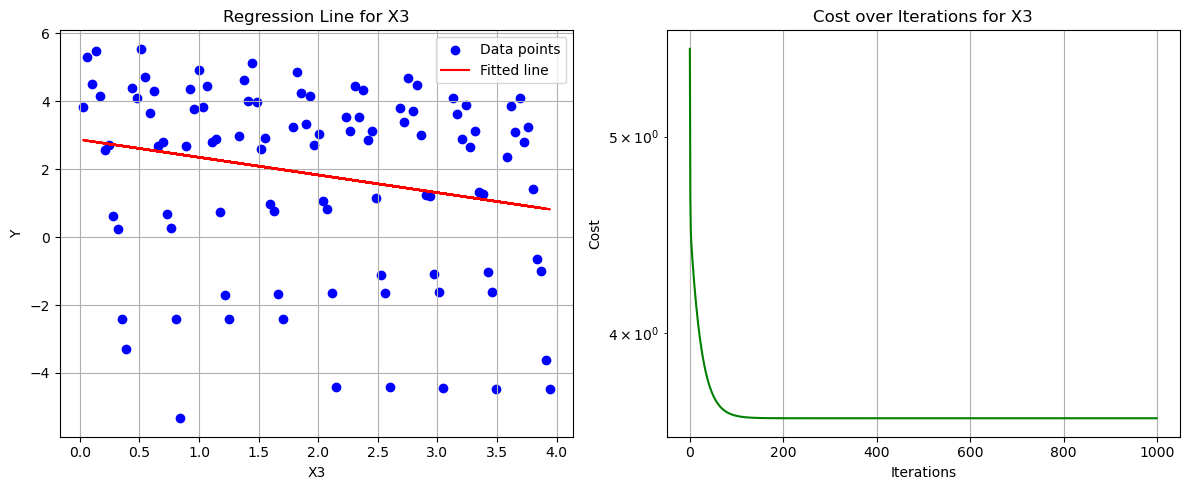

Minimum loss for X3 at learning rate 0.05: 3.629451124750566


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset from the given path
data_path = 'C:\\Users\\angel\\Downloads\\HW1.csv'
df = pd.read_csv(data_path)

# Display the initial rows and column names of the dataset
print(df.head())
print(df.columns)

# Function to perform gradient descent
def perform_gradient_descent(X, Y, lr=0.01, num_iters=1000):
    m = len(Y)
    theta0, theta1 = 0, 0
    cost_history = []

    for _ in range(num_iters):
        predictions = theta0 + theta1 * X
        cost = (1/(2*m)) * np.sum((predictions - Y) ** 2)
        cost_history.append(cost)

        theta0_grad = (1/m) * np.sum(predictions - Y)
        theta1_grad = (1/m) * np.sum((predictions - Y) * X)

        theta0 -= lr * theta0_grad
        theta1 -= lr * theta1_grad

    return theta0, theta1, cost_history

# Function to plot regression results and cost history
def display_results(X, Y, theta0, theta1, cost_history, feature_name):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(X, Y, color='blue', label='Data points')
    plt.plot(X, theta0 + theta1 * X, color='red', label='Fitted line')
    plt.title(f'Regression Line for {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(range(len(cost_history)), cost_history, color='green')
    plt.title(f'Cost over Iterations for {feature_name}')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.yscale('log')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Learning rates and number of iterations
learning_rates = [0.01, 0.05, 0.1]
iterations = 1000

# Run gradient descent for each feature X1, X2, X3
features = ['X1', 'X2', 'X3']
for feature in features:
    results = []
    for lr in learning_rates:
        theta0, theta1, cost_history = perform_gradient_descent(df[feature], df['Y'], lr, iterations)
        results.append((theta0, theta1, cost_history, lr))
        display_results(df[feature], df['Y'], theta0, theta1, cost_history, feature)

    min_loss = min(results[1][2])  # Minimum loss for learning rate 0.05
    print(f"Minimum loss for {feature} at learning rate 0.05: {min_loss}")

         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375
Index(['X1', 'X2', 'X3', 'Y'], dtype='object')
Final linear model: Y = 3.399297051267627 + -1.7332058216404478 * X1 + 0.8489827451594736 * X2 + 0.015073697283572666 * X3
Final cost: 0.9337836009440804


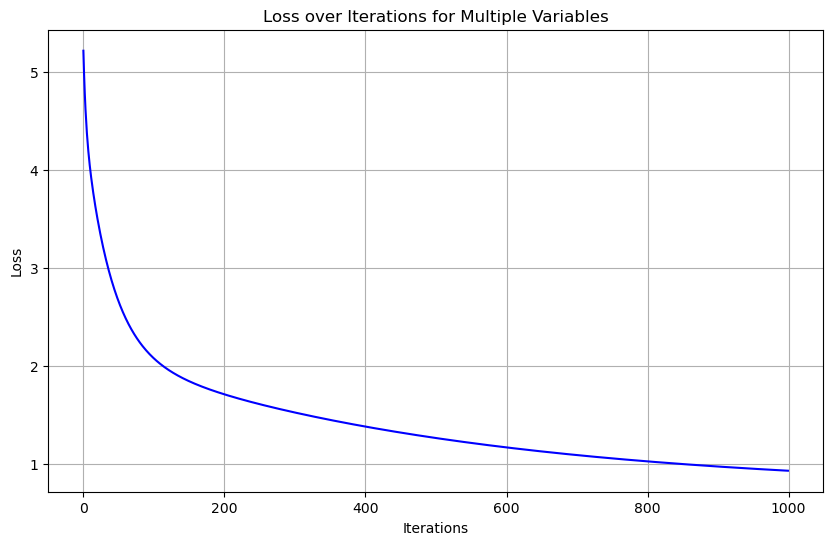

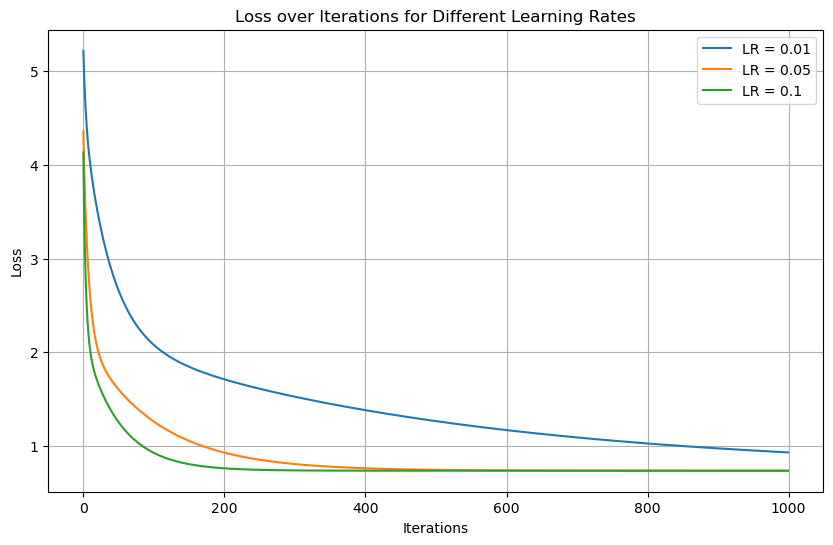

Impact of different learning rates on the final loss and number of training iterations:
Learning rate 0.01: Final cost = 0.9337836009440804, Iterations taken = 1000
Learning rate 0.05: Final cost = 0.7385298570293829, Iterations taken = 1000
Learning rate 0.1: Final cost = 0.7384642444206544, Iterations taken = 1000
Prediction for [1 1 1]: 2.530147672070225
Prediction for [2 0 4]: -0.006819802878978085
Prediction for [3 2 1]: -0.08728122605119637


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset from the given path
data_path = 'C:\\Users\\angel\\Downloads\\HW1.csv'
data = pd.read_csv(data_path)

# Display the initial rows and column names of the dataset
print(data.head())
print(data.columns)


# Gradient Descent for Multiple Variables
def gradient_descent_multi(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        theta = theta - (learning_rate / m) * np.dot(X.T, (np.dot(X, theta) - y))
        cost = (1 / (2 * m)) * np.sum((np.dot(X, theta) - y) ** 2)
        cost_history.append(cost)

    return theta, cost_history

# Prepare data
X = data[['X1', 'X2', 'X3']].values
y = data['Y'].values
X = np.insert(X, 0, 1, axis=1)  # Add intercept term
theta = np.zeros(X.shape[1])

# Set learning rate and iterations
learning_rate = 0.01
iterations = 1000

# Run gradient descent for multiple variables
theta, cost_history = gradient_descent_multi(X, y, theta, learning_rate, iterations)

# Print the final linear model and cost
print(f'Final linear model: Y = {theta[0]} + {theta[1]} * X1 + {theta[2]} * X2 + {theta[3]} * X3')
print(f'Final cost: {cost_history[-1]}')

# Plot cost over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations for Multiple Variables')
plt.grid(True)
plt.show()

# Evaluate impact of different learning rates
learning_rates = [0.01, 0.05, 0.1]
theta_learning_rates = []
cost_learning_rates = []

for lr in learning_rates:
    theta_lr, cost_lr = gradient_descent_multi(X, y, np.zeros(X.shape[1]), lr, iterations)
    theta_learning_rates.append(theta_lr)
    cost_learning_rates.append(cost_lr)

# Plot cost over iterations for different learning rates
plt.figure(figsize=(10, 6))

for i, lr in enumerate(learning_rates):
    plt.plot(range(iterations), cost_learning_rates[i], label=f'LR = {lr}')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

# Print impact of different learning rates on the final loss
print("Impact of different learning rates on the final loss and number of training iterations:")
for i, lr in enumerate(learning_rates):
    print(f"Learning rate {lr}: Final cost = {cost_learning_rates[i][-1]}, Iterations taken = {iterations}")

# Make predictions for new values
new_values = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])
new_values_b = np.c_[np.ones((new_values.shape[0], 1)), new_values]
predictions = np.dot(new_values_b, theta)

for i, new_val in enumerate(new_values):
    print(f"Prediction for {new_val}: {predictions[i]}")